In [1]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex2 import *

2025-10-09 05:44:38.806010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759988679.012261      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759988679.074495      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_37/3168024915.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.11/dist-packages/learntools/deep_learning_intro/ex2.py:126: Syntax

In [2]:
import pandas as pd

concrete = pd.read_csv('../input/dl-course-data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 1) Input Shape #

The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

What would be the input shape for this dataset?

In [3]:
input_shape = [concrete.shape[1]-1]

# 2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [4]:
import torch
import torch.nn as nn

model = nn.Sequential(
    # Hidden ReLU layer 1 (input layer in Keras context)
    nn.Linear(in_features=input_size, out_features=512),
    nn.ReLU(),
    
    # Hidden ReLU layer 2
    nn.Linear(in_features=512, out_features=512),
    nn.ReLU(),
    
    # Hidden ReLU layer 3
    nn.Linear(in_features=512, out_features=512),
    nn.ReLU(),
    
    # Output layer (Linear activation by default, units=1)
    nn.Linear(in_features=512, out_features=1)
)

# 3) Activation Layers #

In [6]:
import torch
import torch.nn as nn

# input_shape=[8] means input_size is 8
input_size = 8 

model = nn.Sequential(
    # Hidden ReLU layer 1 (Keras Dense with activation='relu')
    nn.Linear(in_features=input_size, out_features=32),
    nn.ReLU(),
    
    # Hidden ReLU layer 2 (Keras Dense with activation='relu')
    nn.Linear(in_features=32, out_features=32),
    nn.ReLU(),
    
    # Output layer (Keras Dense with linear activation)
    nn.Linear(in_features=32, out_features=1)
)

# Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

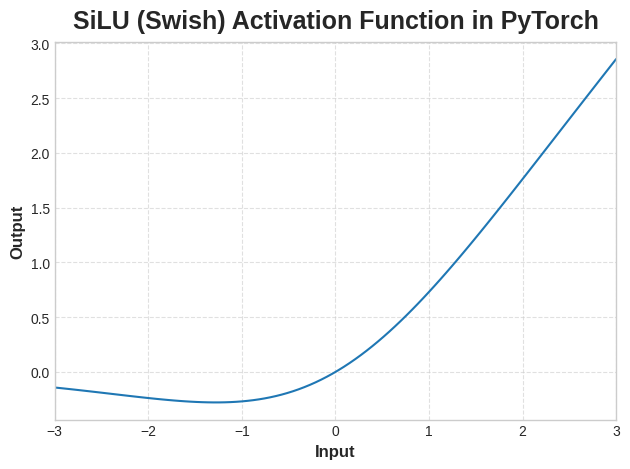

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

activation_layer = nn.SiLU() 

# DATA GENERATION (tf.linspace -> torch.linspace)
# Create 100 points between -3.0 and 3.0. PyTorch requires float32 for model input.
x = torch.linspace(-3.0, 3.0, 100).float() 

# PREDICTION (activation_layer(x))
# torch.no_grad() is used as this is an inference/evaluation step.
with torch.no_grad():
    y = activation_layer(x)

# PLOTTING (Same Matplotlib logic)
plt.figure(dpi=100)

# Convert PyTorch tensors (x and y) to numpy arrays for plotting
plt.plot(x.numpy(), y.numpy())
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title(f"SiLU (Swish) Activation Function in PyTorch")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()